In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn import datasets

from tensorflow import keras as k

import numpy as np

from utils import plot_2d, test_model, test_model_with_standard_scaler, test_keras_model

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

2022-06-07 20:59:32.329596: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-07 20:59:32.329614: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<h2>MLP vs Logistic Regression</h2>

<h4>MLP performing better than Logistic Regression</h4>

Logistic Regression being a method that fits a linear function to the dataset, applying it to a dataset which a polynomial with polynomial boundaries will be inadequate. In this case, a Multi Layer Perpectron model will certainly work better, since it can actually reproduce this polynomial characteristic in its classificiation.

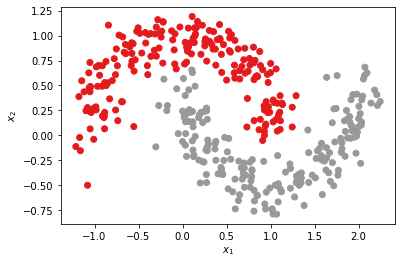

In [15]:
def g_mlp():
    return datasets.make_gaussian_quantiles(
        n_samples=1000,
        n_features=8,
        n_classes=2,
        random_state=42
    )
    
def g_mlp():
    return datasets.make_moons(
        n_samples=400,
        noise=.14,
        random_state=42
    )

X, y = g_mlp()
plot_2d(X, y)

AUC score: 0.992


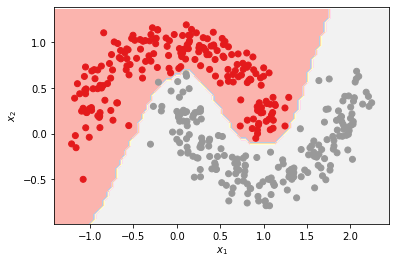

In [16]:
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32, 32, 8),
    activation='relu',
    solver='adam',
    max_iter=3000
)
test_model_with_standard_scaler(mlp, X, y)

AUC score: 0.834


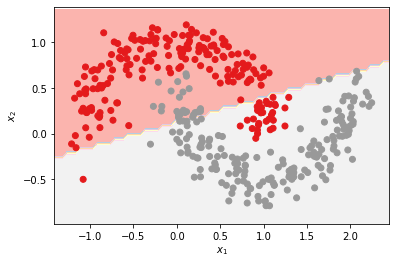

In [17]:
lr = LogisticRegression(max_iter=1000)
test_model(lr, X, y)

<h4>Logistic Regression performing better than MLP</h4>

In short, this can't reliably happen. By its nature, Logistic Regression can be a subset of a MLP. One could simulate that by creating a MLP that consists of only one hidden node with the identity activation function and one output node with zero bias and logistic sigmoid activation. Here, we use a dataset with its classes split by a linear function, thus being the best case scenario for the LR, where it can perform similarly as a MLP.

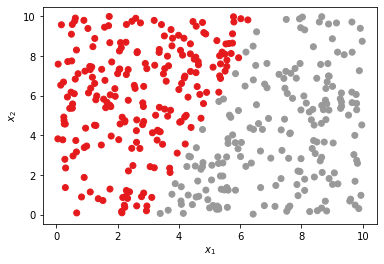

In [18]:
def g_lr():
    def classify(x1, x2):
        func = 3 * x1 - 10
        return int(func / x2 > 1) # 1 or 0 as label

    X = np.random.rand(400, 2) * 10
    y = np.asarray([classify(x1, x2) for x1, x2 in X])
    return X, y

X, y = g_lr()
plot_2d(X, y)

AUC score: 0.998


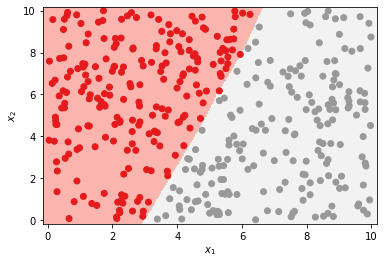

In [19]:
mlp = MLPClassifier(
    hidden_layer_sizes=(32, 16, 8),
    activation='relu',
    solver='adam',
    max_iter=3000
)
test_model_with_standard_scaler(mlp, X, y)

AUC score: 0.996


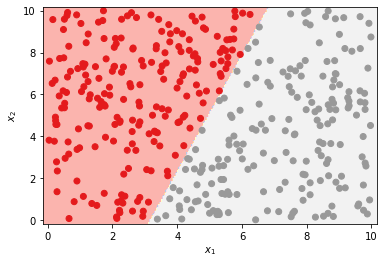

In [20]:
lr = LogisticRegression(max_iter=1000)
test_model(lr, X, y)

<h2>MLP vs kNN</h2>

<h4>MLP performing better than kNN</h4>

Here we have a dataset that is defined by multi-dimensional gaussian distributions. Given its polynimial nature, a MLP model is suitable to fit the data, meanwhile a kNN model strugles to use its lookout on neighbors to achieve a reasonable result.

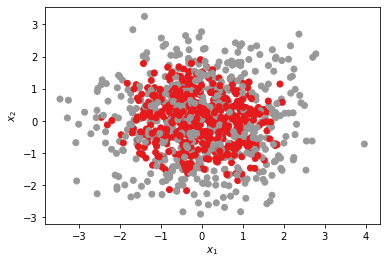

In [13]:
def g_mlp():
    return datasets.make_gaussian_quantiles(
        n_samples=1000,
        n_features=8,
        n_classes=2,
        random_state=42
    )

X, y = g_mlp()
plot_2d(X, y)

In [14]:
mlp = MLPClassifier(
    hidden_layer_sizes=(512, 512, 256, 16),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)
test_model_with_standard_scaler(mlp, X, y)

AUC score: 0.934
The classifier boundary can't be plotted because the dataset has more than 2 dimensions


In [15]:
knn = KNeighborsClassifier(n_neighbors=3)
test_model(knn, X, y)

AUC score: 0.697
The classifier boundary can't be plotted because the dataset has more than 2 dimensions


<h4>kNN performing better than MLP</h4>

The idea behind the following dataset was to create a big amount of randomly placed blobs and labeling them with no specific criteria. The result is a dataset that fits kNN's assumptions on data, that the target value is being able to be determined by looking around the data point's neighbors.

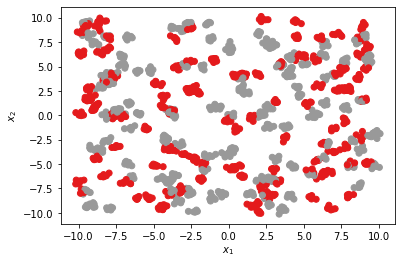

In [16]:
def g_knn():
    X, y = datasets.make_blobs(
        n_samples=1500,
        n_features=2,
        centers=220,
        cluster_std=.16,
        random_state=42
    )
    y = y % 2 # to reduce the amount of different labels to 2
    return X, y
    
X, y = g_knn()
plot_2d(X, y)

AUC score: 0.570


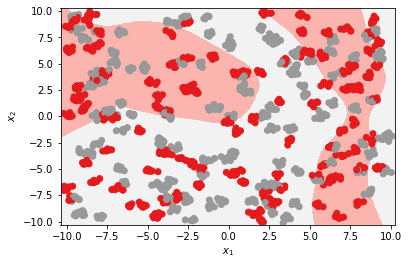

In [17]:
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 128, 64, 32, 8),
    activation='relu',
    solver='adam',
    max_iter=1000
)
test_model_with_standard_scaler(mlp, X, y)

AUC score: 0.923


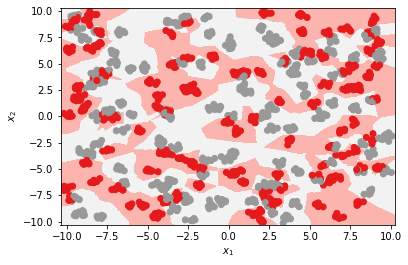

In [18]:
knn = KNeighborsClassifier(n_neighbors=3)
test_model(knn, X, y)

<h2>MLP ReLU vs MLP Sigmoid</h2>

<h4>ReLU performing better than Sigmoid</h4>

There is a reason for ReLU to be so widespread among neural network models, and that's because it consistently solves the problem of vanishing gradients, common for models with sigmoid activation functions, while also having a simple derivative which makes computation quicker. We can observe that the dataset below, relatively easy to be fitted by a model using ReLU, can cause struggle such the aforementioned vanishing gradient phenomenum on a model using the sigmoid function.

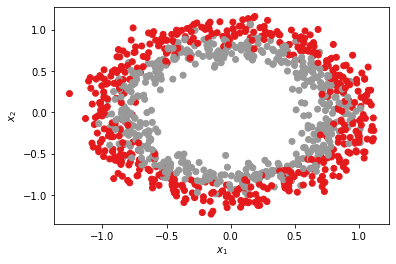

In [5]:
def g_relu():
    X, y = datasets.make_circles(n_samples=1000, noise=0.1, random_state=42)
    return X, y

X, y = g_relu()
plot_2d(X, y)

AUC score: 0.830


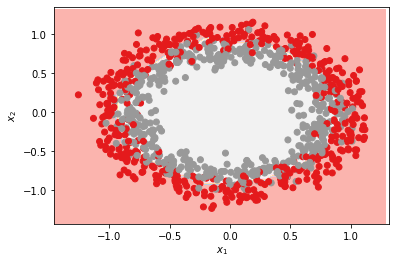

In [16]:
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 128, 8),
    activation='relu',
    solver='adam',
    max_iter=1000
)
test_model_with_standard_scaler(mlp, X, y)

Mean AUC score: 0.500


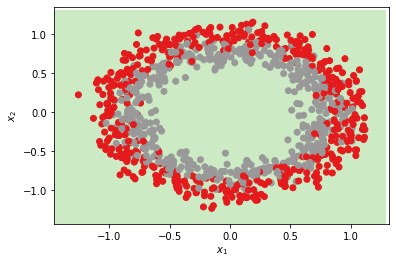

In [7]:
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 128, 8),
    activation='logistic',
    solver='adam',
    max_iter=1000
)
test_model_with_standard_scaler(mlp, X, y)

<h4>Sigmoid performing better than ReLU</h4>

Here we have a simple dataset that divides two classes by a linear function, which should be easily solved by most methods studied in this class. In this case, ReLU is unable to do so because of a phenomenum called Dying ReLU. This is caused by when every hidden layer's coefficient becomes below zero, thus causing the gradient descent to be unable to recover from that state and consequently fit the data to the model. In this case, since it's very much difficult to determine a dataset that may cause this, we initialized the coefficients manually on values below zero to simulate the sittuation.

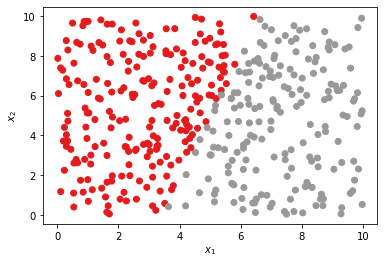

In [2]:
def g_sigmoid():
    def classify(x1, x2):
        func = 3 * x1 - 10
        return int(func / x2 > 1) # 1 or 0 as label

    X = np.random.rand(400, 2) * 10
    y = np.asarray([classify(x1, x2) for x1, x2 in X])
    return X, y

X, y = g_sigmoid()
plot_2d(X, y)

2022-06-07 20:59:45.226825: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-06-07 20:59:45.226906: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mars): /proc/driver/nvidia/version does not exist
2022-06-07 20:59:45.227353: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Mean AUC score: 0.500


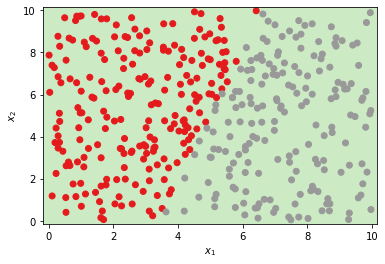

In [3]:
model = k.Sequential()
init = k.initializers.RandomUniform(minval=-1, maxval=0)
model.add(k.layers.Dense(12, input_dim=2, activation='relu', kernel_initializer=init))
model.add(k.layers.Dense(12, activation='relu', kernel_initializer=init))
model.add(k.layers.Dense(1, activation='sigmoid', kernel_initializer=init))

test_keras_model(model, X, y)

Mean AUC score: 0.963


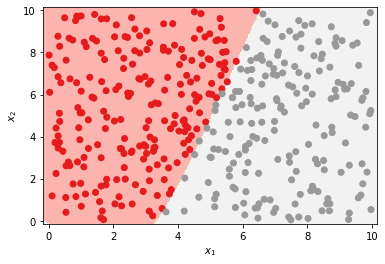

In [4]:
model = k.Sequential()
init = k.initializers.RandomUniform(minval=-1, maxval=0)
model.add(k.layers.Dense(12, input_dim=2, activation='sigmoid', kernel_initializer=init))
model.add(k.layers.Dense(12, activation='sigmoid', kernel_initializer=init))
model.add(k.layers.Dense(1, activation='sigmoid', kernel_initializer=init))

test_keras_model(model, X, y)